# исследование данных о продажах компьютерных игр

В нашем распоряжнии  исторические данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы.

ход исследования:

Шаг 1. изучение общей информации.

Шаг 2. подготовка данных
- Заменить названия столбцов
- Преобразовать данные в нужные типы
- Обработать пропуски
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

Шаг 3. исследовательский анализ данных

- изучить динамику продаж по платформам 
- определить актуальный период
- изучить лидеров продаж среди платформ 
- изучить влияние оценок критиков и игроков на продажи среди одной платформы
- определить самые прибыльные жанры 

Шаг 3. портрет пользователя каждого региона

- определить самые популярные платформы в каждом регионе
- определить самые популярные жанры в каждом регионе
- изучить влияние рейтинга ESRB на продажи в отдельных регионах

Шаг 5. Проверить гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC 
- Средние пользовательские рейтинги жанров Action и Sports 

Шаг 6. общий вывод

 
 # Шаг 1. изучение общей информации

In [2]:
import pandas as pd

data = pd.read_csv('/datasets/games.csv')

print(data.head(20))
data.info()

                                            Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS       

# шаг 2. подготовка данных

In [3]:
#приводим к нижнему регистру
data.columns = data.columns.str.lower()
data.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [5]:
data = data.dropna(subset=['name', 'genre'])


In [6]:
data['rating'] = data['rating'].fillna('no_rating')

In [7]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

#### устраняем пропуски в  year_of_release

In [8]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
# так как пропусков в этом столбце очень мало, меньше 5% из можно спокойно удалять
data = data.dropna(subset=['year_of_release'])
print(data['year_of_release'].unique())
data.isnull().sum()

[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000. 1995. 1991. 1981. 1987. 1980.
 1983.]


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

In [10]:
data['year_of_release'] = data['year_of_release'].astype(int)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating


#### устраняем пропуски в  user_score

In [11]:
#смотрим уникальные знаяение 
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

все значения строковые, так еще и появилось значение tbd

In [12]:
# проверяем количество пропуков
data['user_score'].isna().sum()

6605

In [13]:
# с помощью to_numeric решаем сразу 2 задачи: избавляемся от "" и значения tbd
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [14]:
print('количесво пропусков в столбце user_score стало =', data['user_score'].isna().sum())

количесво пропусков в столбце user_score стало = 8981


In [15]:
data['user_score'].mean()

7.126329894144447

In [16]:
data['user_score'] = data['user_score'].fillna(7.1)
data['user_score'].isna().sum()

0

#### устраняем пропуски в critic_score


In [17]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [18]:
data['critic_score'].mean()

68.99436302142053

In [19]:
print('количесво пропусков в столбце critic_score =', len(data[data['critic_score'].isna()]))

количесво пропусков в столбце critic_score = 8461


In [20]:
# меняем пропуски на среднее и приводим к целому числу
data['critic_score'] = data['critic_score'].fillna(69)
data['critic_score'] = data['critic_score'].astype(int)
print('количесво пропусков в столбце critic_score стало =', len(data[data['critic_score'].isna()]))

количесво пропусков в столбце critic_score стало = 0


In [21]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

- пропуски в столбце с годом выпуска были удалены, т.к. их очень мало
- в столбце с `оценками пользователей` были исправлены как тип данных так и лишние значения, а пропуски были заменены на среднее, как и в столбце с `оценками критиков` 
- был выбран метод среднего, т.к. значения находятся в небольших диапазонах, и пиковые значения и будут искажать данные

#### суммарные продажи во всех регионах

In [22]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.1,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69,7.1,no_rating,31.38


# Шаг 3. исследовательский анализ данных

#### количество игр вышедших в разные годы


<AxesSubplot:>

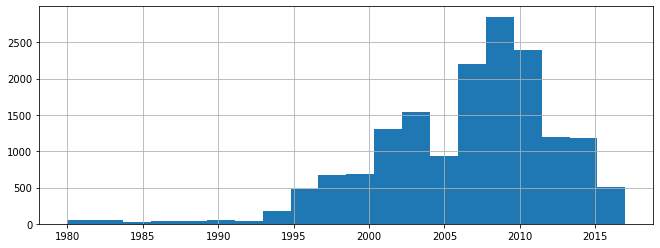

In [23]:
data['year_of_release'].hist(bins=20, range=(1980, 2017),figsize=( 11 , 4 ))

In [24]:
data.groupby('year_of_release')['name'] .count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [25]:
data = data.query('year_of_release > 1995')

по данным видно, что игр вышедших раннее 1995 года значительно меньше, чем игр после, поэтому сокращаем исходный массив 

#### распределение платформ с наибольшими доходами по годам 


<AxesSubplot:xlabel='platform'>

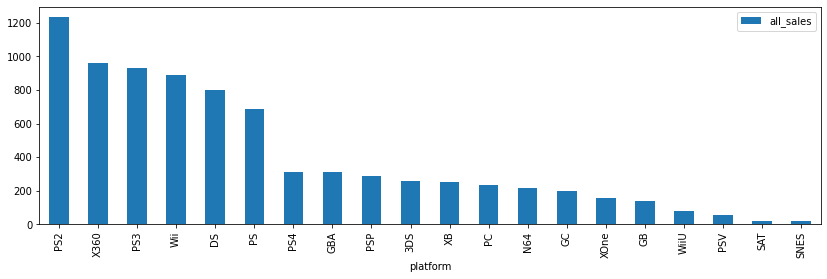

In [26]:
# находим платформы с наибольшими продажами

top_platforms = data.groupby('platform').agg({'all_sales':'sum'}) \
     .sort_values(by = 'all_sales', ascending = False).head(20)
top_platforms.plot(kind="bar",figsize=( 14 , 4 ))


In [27]:
#форматируем в список из индексов
top_platforms = top_platforms.index.values.tolist ()
top_platforms

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'XB',
 'PC',
 'N64',
 'GC',
 'XOne',
 'GB',
 'WiiU',
 'PSV',
 'SAT',
 'SNES']

In [28]:
#создаем df с платформами из топ 20 по продажам
data_top = data.loc[data['platform'].isin(top_platforms)]
data_top

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69,7.1,no_rating,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69,7.1,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69,7.1,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,69,7.1,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69,7.1,no_rating,0.01


<AxesSubplot:title={'center':'Распределения топ 20 платформ с их общим заработком по годам'}, xlabel='year_of_release'>

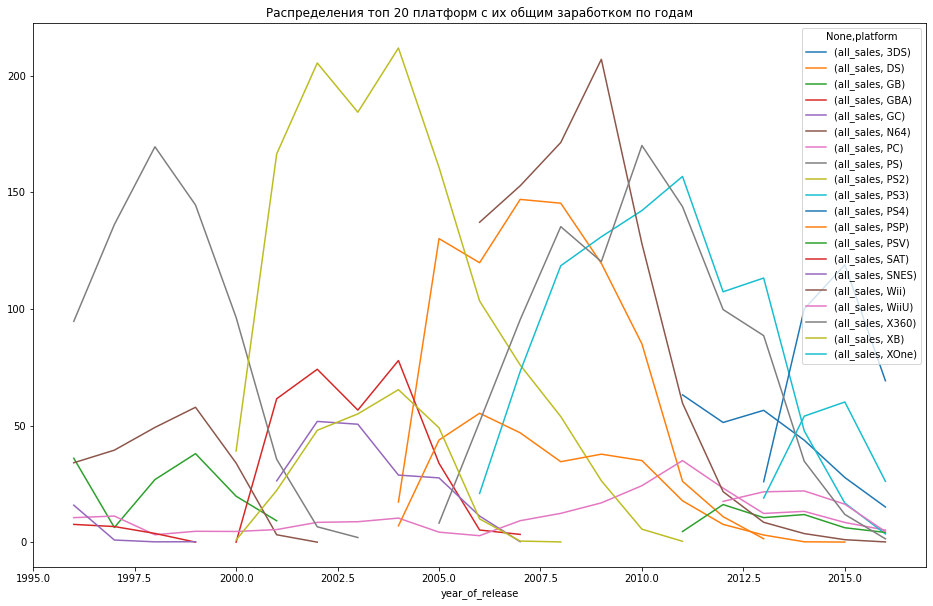

In [29]:
#строим график распределения топ 20 платформ с их общим заработком по годам
pd.pivot_table(data_top,
    index=['year_of_release'],
    values=['all_sales'],
    columns=['platform'],
    aggfunc='sum').plot(figsize=(16, 10), title = 'Распределения топ 20 платформ с их общим заработком по годам')

по граффику видно:
- некоторые платформы, которые стоят в топ 20 уже не актуальны, и последние 5-10 лет не приносят прибыли
- в среднем, в каждые 5 лет появляется новая платформа, за первые 2 года она доходит до пика продаж, а далее понисходящей 


#### определяем актуальный период с 2013 года включительно 

In [30]:
# создаем ноный df с актуальными данными с 2013 года, т.к. данные более ранних лет будут не Релевантны для анализа на 2017 год
data_actual = data.query('year_of_release > 2012')
data_actual.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,69,7.1,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,69,7.1,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,69,7.1,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,69,7.1,no_rating,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


<AxesSubplot:xlabel='year_of_release'>

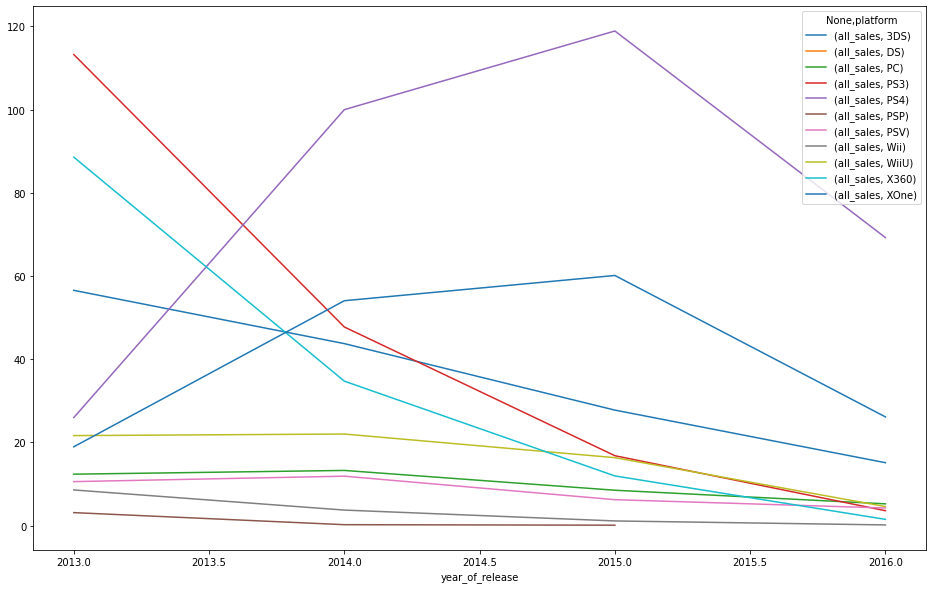

In [31]:
pd.pivot_table(data_actual,
    index=['year_of_release'],
    values=['all_sales'],
    columns=['platform'],
    aggfunc='sum').plot(figsize=(16, 10))

In [32]:
top_platforms_actual = ['PS4','3DS','XOne']

по графику выше видно, что всего две платформы растут, это `PS4` и `XOne`. Остальные платформы либо резко падают (из-за появления более новых аналогов) либо постепенно теряют позиции

#### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам 

<AxesSubplot:>

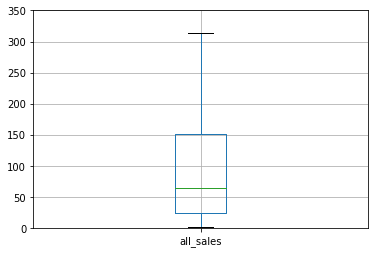

In [33]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.ylim(0, 350)
 

data_actual1 = pd.pivot_table(data_actual,
    index=['platform'],
    values=['all_sales'],
    aggfunc='sum')
data_actual1.boxplot()

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

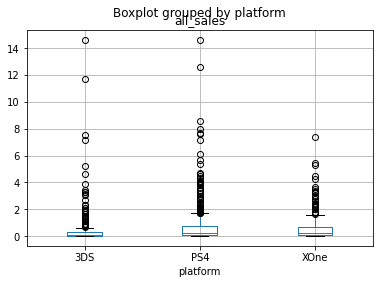

In [34]:
import seaborn as sns
data_actual.loc[data_actual['platform'].isin(top_platforms_actual)].boxplot(column = 'all_sales', by='platform')

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

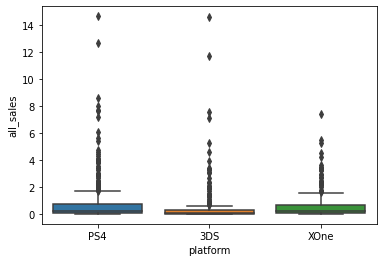

In [35]:
import seaborn as sns
sns.boxplot(x='platform', y='all_sales', data=data_actual.loc[data_actual['platform'].isin(top_platforms_actual)])

In [36]:
data_actual1.describe()

,all_sales
count,11.000000
mean,99.153636
std,97.516096
min,1.540000
25%,23.325000
50%,64.630000
75%,151.285000
max,314.140000


по данным выше можно сказать: 
- средний заработок платформы составляет 99
- среднее отклонение 97

эти данные дают нам понять, что цены на игры очень сильно варируются, в пределах от 1.5 до 314 долларов

#### влияние отзывов пользователей и критиков на продажи внутри платформы `PS4` 

<AxesSubplot:xlabel='all_sales', ylabel='user_score'>

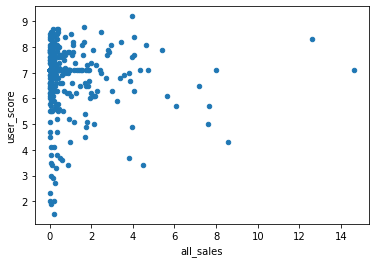

In [37]:
data_actual.query('platform == "PS4"').plot(x='all_sales', y='user_score', kind='scatter')

In [38]:
data_actual['all_sales'].corr(data_actual['user_score'])

-0.03691177084490369

<AxesSubplot:xlabel='all_sales', ylabel='critic_score'>

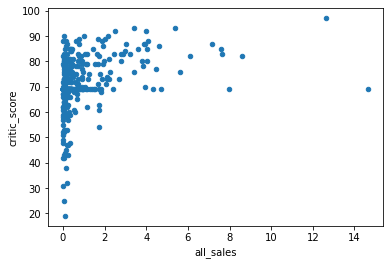

In [39]:
data_actual.query('platform == "PS4"').plot(x='all_sales', y='critic_score', kind='scatter')

In [40]:
data_actual['all_sales'].corr(data_actual['critic_score'])

0.271467531749726

Согласно корреляциям, прямой связи между рейтингом как критиков так и пользователей - нет. однако на графике можно заметить незначительное увеличение продаж при увеличении оценки.

#### общее распределение игр по жанрам 

<AxesSubplot:>

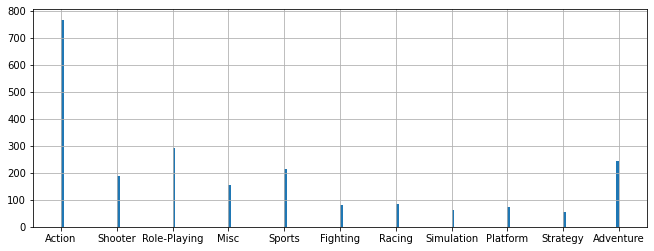

In [41]:
#определяем кол-во игр в каждом жанре
data_actual['genre'].hist(bins=200, range=(0, 10),figsize=(11, 4))

<AxesSubplot:xlabel='genre'>

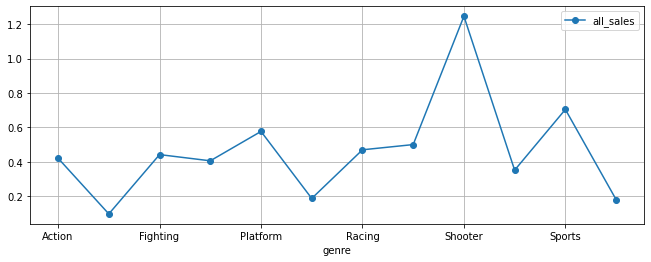

In [42]:
#определяем кол-во прожаж по жанру
(data_actual
    .pivot_table(index='genre', values='all_sales')
    .plot( style='o-',figsize=(11, 4),grid = True)
)

<AxesSubplot:xlabel='year_of_release'>

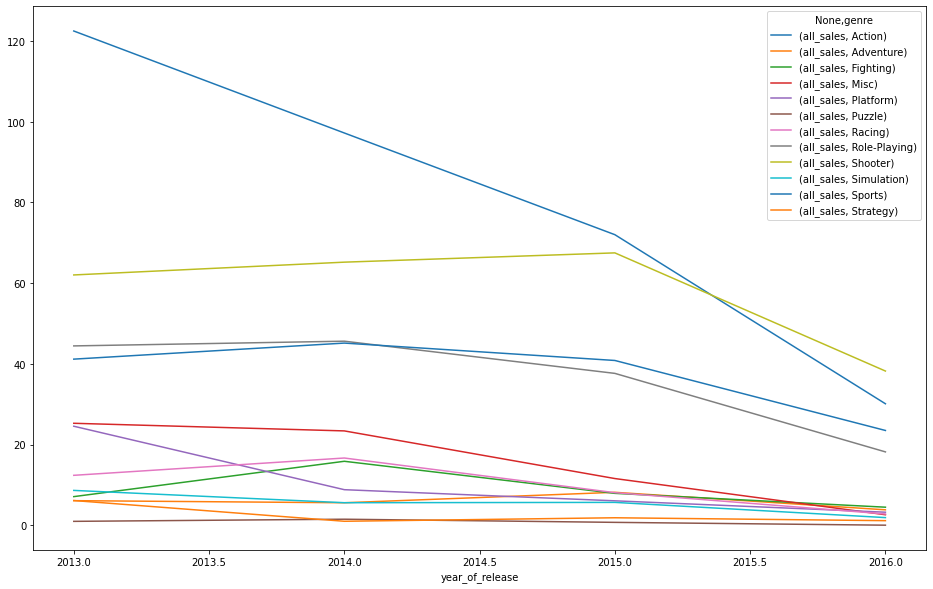

In [43]:
#определяем сумму продаж по жанру в распределении по годам
pd.pivot_table(data_actual,
    index=['year_of_release'],
    values=['all_sales'],
    columns=['genre'],
    aggfunc='sum').plot(figsize=(16, 10))

In [44]:
top_genre = data_actual.groupby('genre').agg({'all_sales':'mean'}) \
     .sort_values(by = 'all_sales', ascending = False).head(20)
top_genre

,all_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


последние 3 графика и 1 таблица нам говорят о следующем:
- наибольшее количесвто игр выходят в жанре `action`
- однако, наибольшее количество продаж у жанра `shooter`
- по средней стоимости игры ледирую такие жанры как `shooter`, `Sports`, `Platform`   

хоть и самым прибыльным жанром можно назвать `action`, однако если учитывать тот факт, что игр в этом жанре выходит в разы больше, то более дорогом жанром считается `Shooter` 

# Шаг 4.  портрет пользователя каждого региона

### распределение платформ по регионам 

<AxesSubplot:xlabel='platform'>

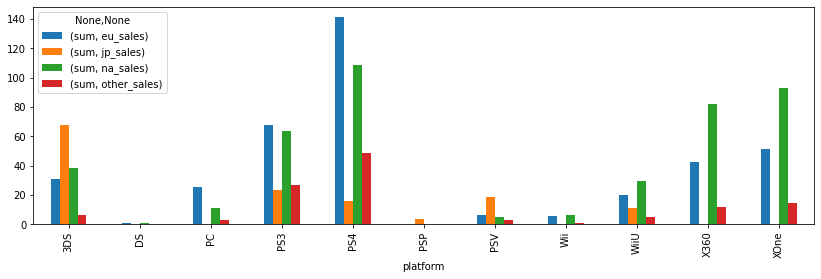

In [45]:
platform = pd.pivot_table(data_actual,
               index=['platform'],
               values=['na_sales','eu_sales','jp_sales','other_sales'],
               aggfunc=['sum'])
platform.reset_index(inplace= True )
platform.plot(x='platform', kind="bar", figsize=( 14 , 4 ))


по таблице выше видно:
- для Европы топ 5 платформ являются `PS4`, `PS3`, `XOne`, `X360`, `3DS` 
- для северной Америки топ 5 платформ являются `PS4`, `XOne`, `X360`, `PS3`, `3DS`  
- для Японии топ 5 платформ являются `3DS`,`PS3`, `PSV`,`PS4`,`WIIU`
- для остальных стран топ 5 платформ являются `PS4`,`PS3`,`XOne`,`X360`, `3DS`

`PS4` является топ платформой для всех регионов кроме японии, где лидером по продажам стала `3DS`. А вот `XOne` и `X360`, которые находяться в топ 5 всех стран не представлены в японии. 

#### Исследование  регионов по жанрам 

<AxesSubplot:xlabel='genre'>

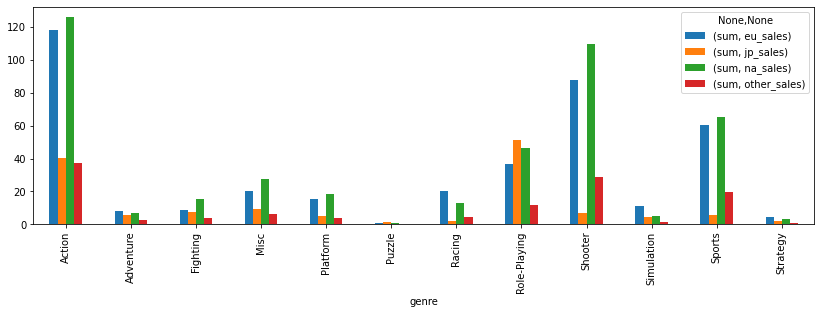

In [46]:
genre = pd.pivot_table(data_actual,
               index=['genre'],
               values=['na_sales','eu_sales','jp_sales','other_sales'],
               aggfunc=['sum'])
genre.reset_index(inplace= True )
genre.plot(x='genre', kind="bar", figsize=( 14 , 4 ))

- для Европы топ 5 жанров являются `action`, `shooter`, `sports`, `role-playing`, `racing` 
- для северной Америки топ 5 жанров являются `action`, `shooter`, `sports`, `role-playing`, `misc`  
- для Японии топ 5 жанров являются `role-playing`,`action`, `misc`,`fighting`,`shooter`
- для остальных стран топ 5 жанров являются `action`, `shooter`, `sports`, `role-playing`, `misc`

по таблице видно, что в европе и северной америке `action`и `shooter` являються хитами, и намного превышают все другие жанры во всех регионах. однако отличие японского рынка видно и тут: если топ 4 жанров во всех регионах одинаковая, то в японии на первом месте `role-playing`, а на третьем `fighting` - который не предтавлен в топе в других регионах.

### Влияние рейтинга ESRB на продажи 

<AxesSubplot:xlabel='rating'>

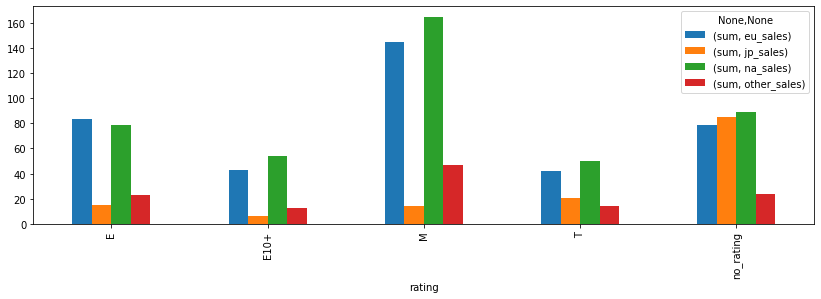

In [47]:
rating = pd.pivot_table(data_actual,
               index=['rating'],
               values=['na_sales','eu_sales','jp_sales','other_sales'],
               aggfunc=['sum'])
rating.reset_index(inplace= True )
rating.plot(x='rating', kind="bar", figsize=( 14 , 4 ))

по талице выше видно:
- в японии и других странах различие в продаже игр с определенным рейтингом не такая большая, в то время как в европе и северной америке игры с рейтингом `M` продаються больше чем в 2 раза

- игры без рейтинга по продажам занимают второе место в европе, северной америке и в остальных странах, однако в японии - продаются лучше всего

# Шаг 5. Проверька гипотез

H₀ - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H₁ - Средние пользовательские рейтинги платформ Xbox One и PC отличаются 


In [48]:
from scipy import stats as st
import numpy as np


sample_XOne = data_actual.loc[data_actual['platform'] == 'XOne', 'user_score']
sample_XOne.tolist()

sample_PC = data_actual.loc[data_actual['platform'] == 'PC', 'user_score']
sample_PC.tolist()

alpha = 0.05

results = st.ttest_ind(sample_XOne, sample_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.06009460906916332
Не получилось отвергнуть нулевую гипотезу


In [49]:
sample_Action = data_actual.loc[data_actual['genre'] == 'Action', 'user_score']
sample_Action.tolist()

sample_Sports = data_actual.loc[data_actual['genre'] == 'Sports', 'user_score']
sample_Sports.tolist()

alpha = 0.05

results1 = st.ttest_ind(sample_Action, sample_Sports)

print('p-значение:', results.pvalue)

if results1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.06009460906916332
Отвергаем нулевую гипотезу


# общий вывод


1. после подготовки данных (удаления/заполнения пропусков, привидение данных к нужному типу) был проведен исследовательский анализ

- был определен актуальный период, в который определенная платформа набирает свой пик и дальше уступает место более новым аналогам - 5 лет
- согласно актуальному периоду, мы расматривали данные с 2013 года включительно, что бы понять какие платформы сейчас на пике и востребованы в индустрии
- лидером продаж среди платформ можно назвать `ps4`
- среди жанров по продажам выделяються два - `Action` и `Shooter` 

2. региональные особенности

Были изучены 4 региона: `серверная америка`, `европа`, `япония` и `остальные страны`

- во всех регионах кроме японии лидерами среди платформ являються `PS4`, `PS3`, `XOne`, `X360`. в японии наибольшую популярность имеет `3DS`. А вот `XOne` и `X360`, которые находяться в топ 5 всех стран, не представлены в японии.

- портрет пользователя `серверная америки`, `европы`и `остальных стран` схож - это человек играющий на `ps4` в `Action`
- портрет пользователя `японии` - играет на `3DS` в `role-playing` 

-  рейтинг ESRB влияет на продажи в европе и северной америке: игры с рейтингом `M` продаються больше чем в 2 раза. в остальных регионах сильных различий не найдено
- игры без рейтинга по продажам занимают второе место в европе, северной америке и в остальных странах, однако в японии - продаются лучше всего

- так же бул проведен анализ равенства средних двух генеральных совокупностей, а именно Средние пользовательские рейтинги платформ Xbox One и PC. - нулевую гепотезу `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые` ну удалось опровергнуть

